# This document is to give you an idea of some tests that I have already ran preliminarily in the past.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../')
import dtw
from datetime import datetime
import random
import cmath

The first and simplest test has already been shown in the noteboko 'Simple users guide to the DWT algorithm', where I create a simple 2D eliptica; gaussian and change it in space only, not in time.
<br>
<br>
The following first two tests are an extension of that. The first reates 3 gaussians of different amplitudes and sizes and displaces them by the same amount. The second creates the same three gaussians but then displaces them by different amounts and in different directions.
<br>
<br>
For the sake of brevity in this guide, I shall use strip_bool and frame_bool = False. I shall also use 128x64 pixel frames (x by y), and the same list of strip widths and list of m numbers.

In [2]:
# this function is just to create 2D eliptic gaussians
def blob_maker(A, x, y, x0, y0, sigma_x, sigma_y):
    z = np.zeros([len(y), len(x)])
    for i in range(0, len(x)):
        for j in range(0, len(y)):
            z[j,i] = A * np.exp(-((((x[i] - x0)**2) / \
                    (2.0 * sigma_x**2)) + (((y[j] - y0)**2) / \
                                           (2.0*sigma_y**2))))
    return z

In [3]:
# Initialising the frames
x = np.linspace(1,128,128)
y = np.linspace(1,64,64)
B1 = blob_maker(32, x, y, 32., 48., 12.0, 7.0)
B2 = blob_maker(24., x, y, 97, 33., 9.0, 6.0)
B3 = blob_maker(29., x, y, 79, 15., 6.0, 3.5)
B1A = blob_maker(32., x, y, 38., 41., 12.0, 7.)
B2A = blob_maker(24., x, y, 103., 26., 9.0, 6.0)
B3A = blob_maker(29., x, y, 85., 9., 6.0, 3.5)
z1 = B1 + B2 + B3
z2 = B1A + B2A + B3A
xx, yy = np.meshgrid(x, y)
# note that in frame 1, the blobs can be found at:
# [47,31], [32,96] and [14,78]
# in frame 2, the blobs can be found at:
# [40,37], [25,102] and [8,84]

Text(0.5, 1.0, 'Frame 2, all displaced (6,-7)')

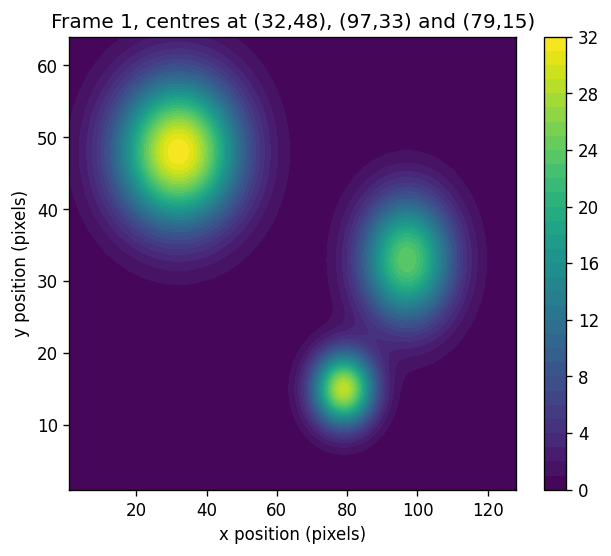

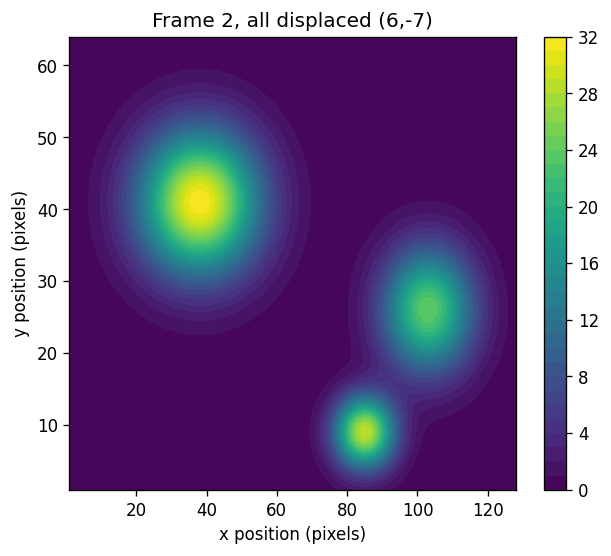

In [4]:
plt.figure(figsize = (6,5), dpi = 120)
plt.contourf(xx, yy, z1, 32, cmap = plt.cm.viridis)
plt.colorbar()
plt.xlabel('x position (pixels)')
plt.ylabel('y position (pixels)')
plt.title('Frame 1, centres at (32,48), (97,33) and (79,15)')

plt.figure(figsize = (6,5), dpi = 120)
plt.contourf(xx, yy, z2, 32, cmap = plt.cm.viridis)
plt.colorbar()
plt.xlabel('x position (pixels)')
plt.ylabel('y position (pixels)')
plt.title('Frame 2, all displaced (6,-7)')

In [5]:
t1 = datetime.now()
# note here there are no specific R / z coordinates like in the 
# real data, so only xx and yy, which are essentially the 2D
# pixels arrays are entered
vel_x, vel_y = dtw.DTW(z1, z2, xx, yy)
t2 = datetime.now()
print('Time taken for this test was {}'.format(t2 - t1))

Time taken for this test was 0:00:00.665620


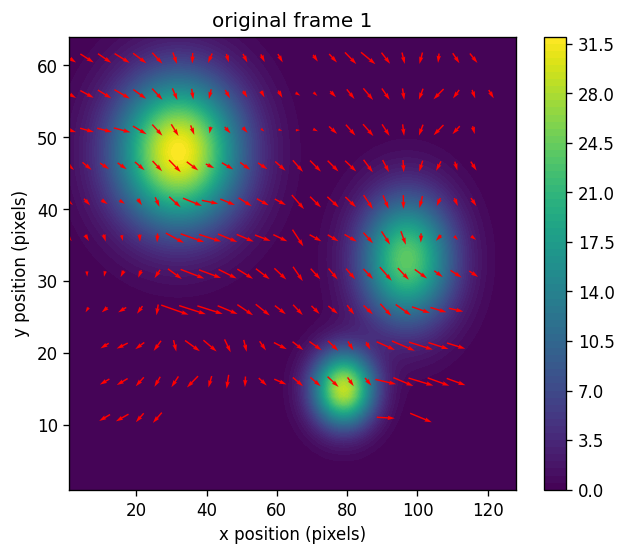

In [7]:
plt.figure(figsize = (6,5), dpi = 120)
plt.contourf(xx, yy, z1, 64, cmap = plt.cm.viridis)
plt.colorbar()
plt.xlabel('x position (pixels)')
plt.ylabel('y position (pixels)')
plt.title('original frame 1')
plt.quiver(xx[::5, ::5], yy[::5, ::5], vel_x[::5, ::5], \
           vel_y[::5, ::5], color = 'r', pivot = 'mid')

In [8]:
print('The actual displacement should have been vx = 6, vy = -7')
print('The calculated displacements for each blob was:')
print('Blob 1:, vx = {:.2f}, vy = {:.2f}'.\
                            format(vel_x[47,31], vel_y[47,31]))
print('Blob 2:, vx = {:.2f}, vy = {:.2f}'.\
                            format(vel_x[32,96], vel_y[32,96]))
print('Blob 3:, vx = {:.2f}, vy = {:.2f}'.\
                            format(vel_x[14,78], vel_y[14,78]))

The actual displacement should have been vx = 6, vy = -7
The calculated displacements for each blob was:
Blob 1:, vx = 5.46, vy = -7.01
Blob 2:, vx = 5.66, vy = -7.85
Blob 3:, vx = 5.26, vy = -5.61


Next I look at the test where the blobs move in different directions with different velocities

In [9]:
B1 = blob_maker(32, x, y, 32., 48., 12.0, 7.0)
B2 = blob_maker(24., x, y, 97, 33., 9.0, 6.0)
B3 = blob_maker(29., x, y, 79, 15., 6.0, 3.5)
B1A = blob_maker(32., x, y, 38., 41., 12.0, 7.)
B2A = blob_maker(24., x, y, 92., 36., 9.0, 6.0)
B3A = blob_maker(29., x, y, 73., 19., 6.0, 3.5)
z1 = B1 + B2 + B3
z2 = B1A + B2A + B3A
# note that in frame 1, the blobs can be found at:
# [47,31], [32,96] and [14,78]
# in frame 2, the blobs can be found at:
# [40,37], [35,91] and [18,72]

Text(0.5, 1.0, 'Frame 2, all displaced (6,-7)')

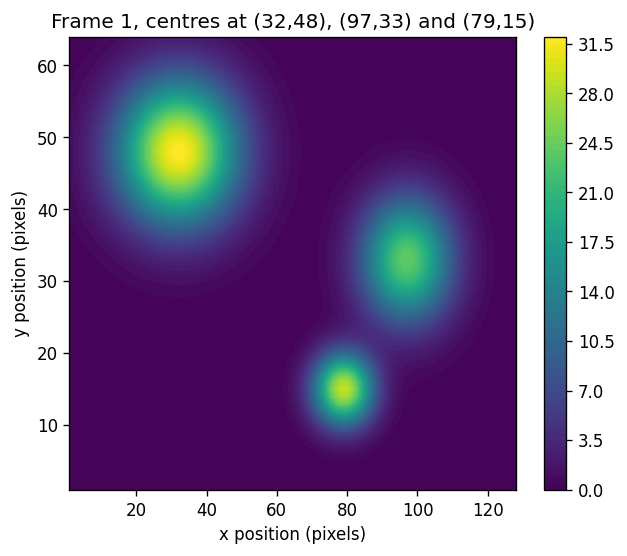

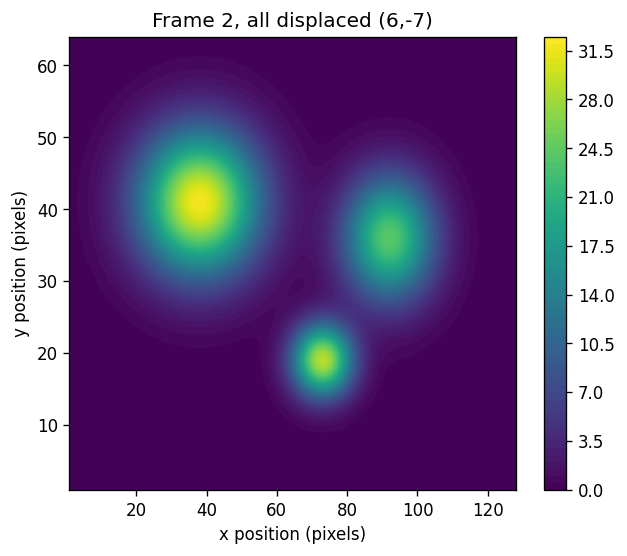

In [10]:
plt.figure(figsize = (6,5), dpi = 120)
plt.contourf(xx, yy, z1, 64, cmap = plt.cm.viridis)
plt.colorbar()
plt.xlabel('x position (pixels)')
plt.ylabel('y position (pixels)')
plt.title('Frame 1, centres at (32,48), (97,33) and (79,15)')

plt.figure(figsize = (6,5), dpi = 120)
plt.contourf(xx, yy, z2, 64, cmap = plt.cm.viridis)
plt.colorbar()
plt.xlabel('x position (pixels)')
plt.ylabel('y position (pixels)')
plt.title('Frame 2, all displaced (6,-7)')

In [11]:
t1 = datetime.now()
# note here there are no specific R / z coordinates like in the 
# real data, so only xx and yy, which are essentially the 2D
# pixels arrays are entered
vel_x, vel_y = dtw.DTW(z1, z2, xx, yy)
t2 = datetime.now()
print('Time taken for this test was {}'.format(t2 - t1))

Time taken for this test was 0:00:00.633474


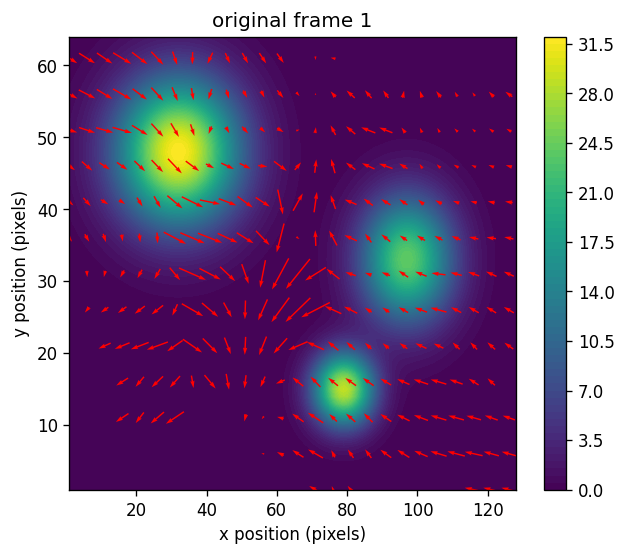

In [12]:
plt.figure(figsize = (6,5), dpi = 120)
plt.contourf(xx, yy, z1, 64, cmap = plt.cm.viridis)
plt.colorbar()
plt.xlabel('x position (pixels)')
plt.ylabel('y position (pixels)')
plt.title('original frame 1')
plt.quiver(xx[::5, ::5], yy[::5, ::5], vel_x[::5, ::5], \
           vel_y[::5, ::5], color = 'r', pivot = 'mid')

In [13]:
print('Blob 1: displacement should have been (6,-7)')
print('The calculated displacement was vx = {:.2f}, vy = {:.2f}'.\
                            format(vel_x[47,31], vel_y[47,31]))
print('Blob 2: displacement should have been (-5,3)')
print('The calculated displacement was vx = {:.2f}, vy = {:.2f}'.\
                            format(vel_x[32,96], vel_y[32,96]))
print('Blob 3: displacement should have been (-6,4)')
print('The calculated displacement was vx = {:.2f}, vy = {:.2f}'.\
                            format(vel_x[14,78], vel_y[14,78]))

Blob 1: displacement should have been (6,-7)
The calculated displacement was vx = 5.18, vy = -6.55
Blob 2: displacement should have been (-5,3)
The calculated displacement was vx = -4.91, vy = 2.55
Blob 3: displacement should have been (-6,4)
The calculated displacement was vx = -5.50, vy = 4.03


##### Next I look at recreating a test from a paper - D. M. Kriete et al., Rev. Sci. Instrum. 89, 10E107 (2018)

Details of the test I ran for this are in my labbook currently at York whilst I'm working away in Prague, so the exact details on numbers I used to create this test will be updated into this notebook at a later date.

There are four tests I created: there are two different types of fake turbulence created (one with larger structures and one with smaller structures), and it was tested with two different velocities:
<br>
Turb 1 was with the smaller structures with the smaller velocity.
<br>
Turb 2 was with the larger structures with the smaller velocity.
<br>
Turb 3 was with the smaller structures with the larger velocity.
<br>
Turb 4 was with the larger structures with the larger velocity.

In [14]:
x_turb = np.load('turb_data_1.npz')['x']
y_turb = np.load('turb_data_1.npz')['y']
turb1 = np.load('turb_data_1.npz')['z']
turb2 = np.load('turb_data_2.npz')['z']
turb3 = np.load('turb_data_3.npz')['z']
turb4 = np.load('turb_data_4.npz')['z']

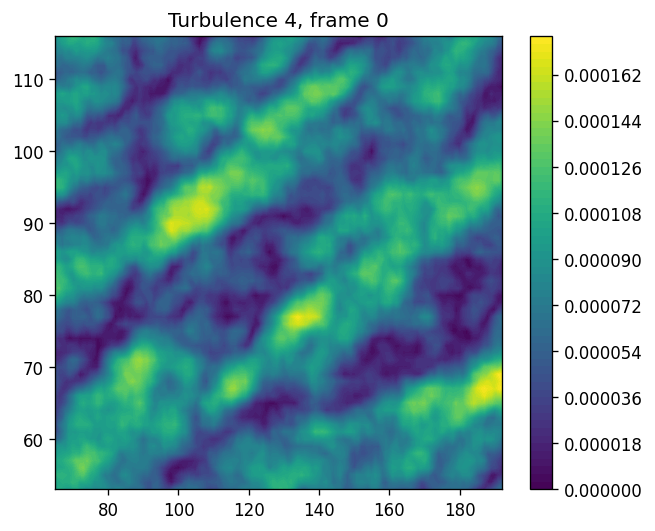

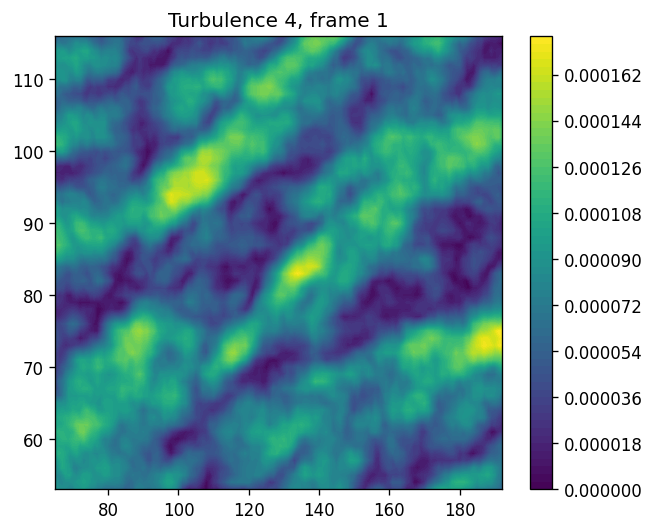

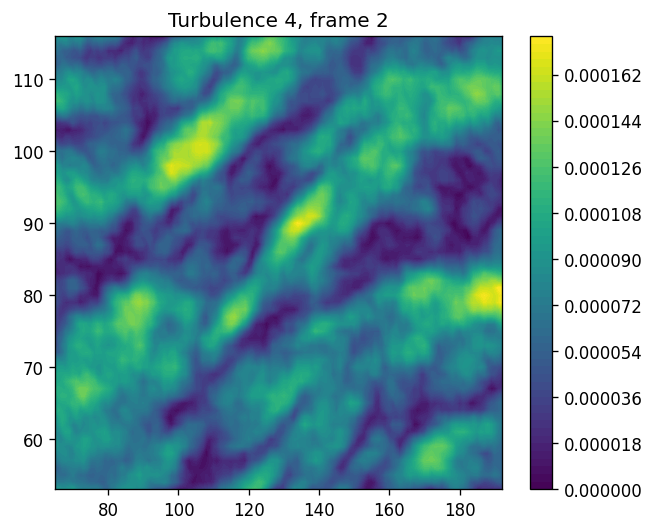

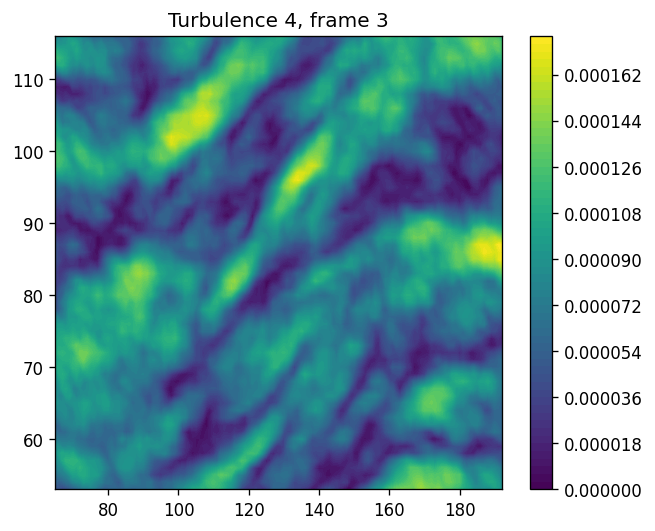

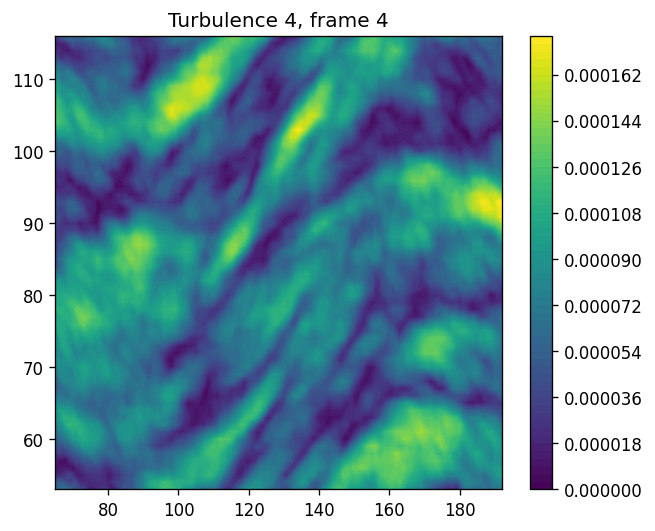

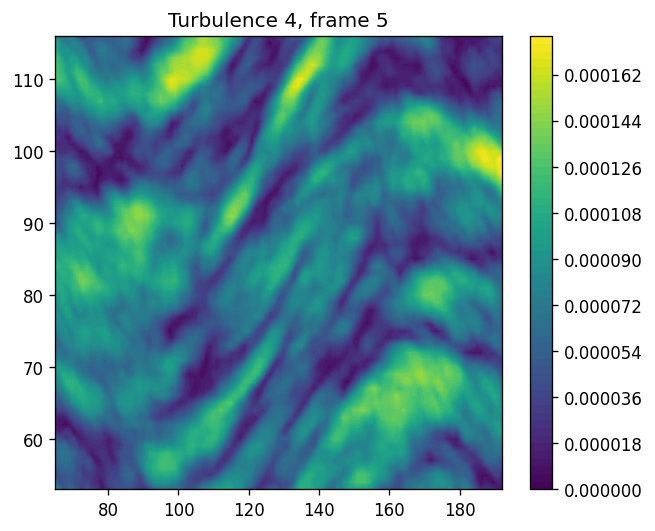

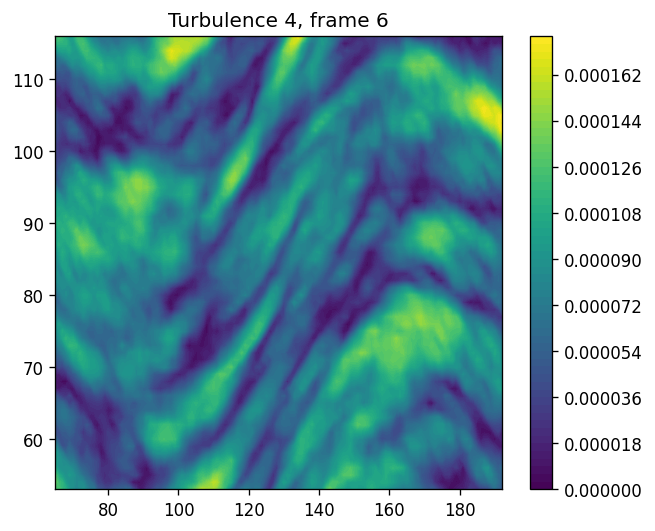

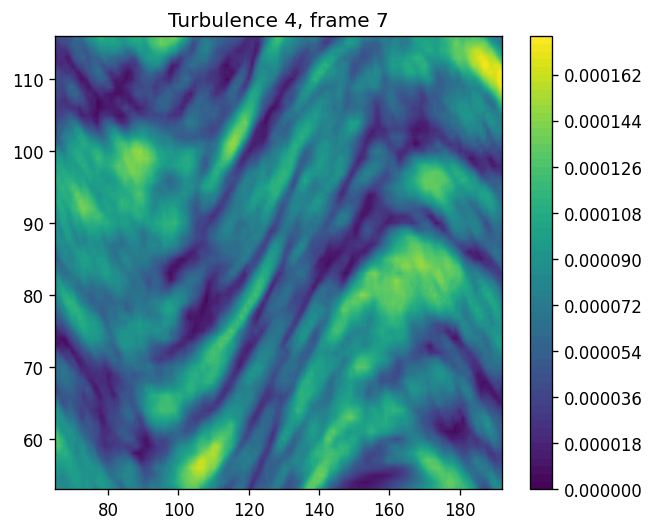

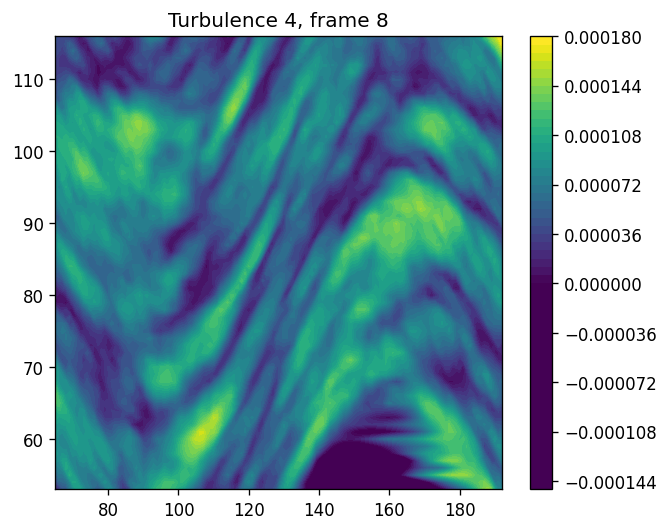

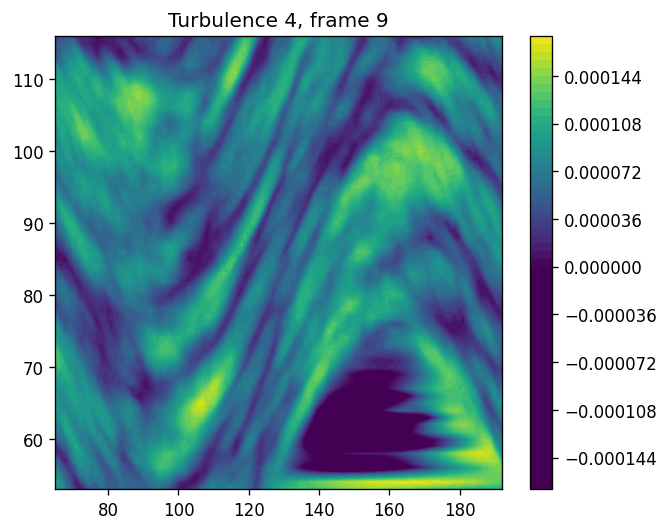

In [15]:
for i in range(0, turb4.shape[0]):
    plt.figure(figsize = (6,5), dpi = 120)
    plt.title('Turbulence 4, frame {}'.format(i))
    plt.contourf(x_turb, y_turb, turb4[i,:,:],  64, vmin = 0, \
                    vmax = np.amax(turb4), cmap = plt.cm.viridis)
    plt.colorbar()

In [16]:
xx_turb, yy_turb = np.meshgrid(x_turb, y_turb)
t1 = datetime.now()
vel_x, vel_y = dtw.DTW(turb4[0,:,:], \
            turb4[1,:,:], xx_turb, yy_turb)
t2 = datetime.now()
print('Time taken for this test was {}'.format(t2 - t1))

Time taken for this test was 0:00:00.685821


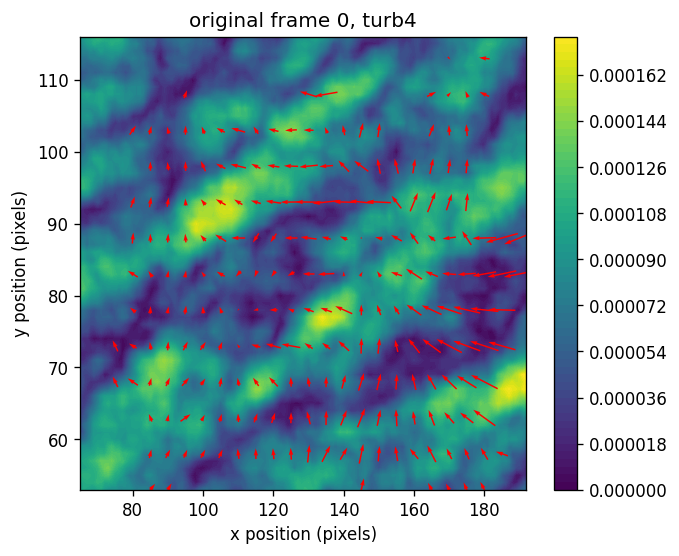

In [18]:
plt.figure(figsize = (6,5), dpi = 120)
plt.contourf(xx_turb, yy_turb, turb4[0,:,:], 64, \
                             cmap = plt.cm.viridis)
plt.colorbar()
plt.xlabel('x position (pixels)')
plt.ylabel('y position (pixels)')
plt.title('original frame 0, turb4')
plt.quiver(xx_turb[::5, ::5], yy_turb[::5, ::5], \
           vel_x[::5, ::5], vel_y[::5, ::5], color = 'r', \
                                               pivot = 'mid')

The above is just an example of one of the turb tests. It is also taken as a mean for each x location, as described in Kriete's paper from 2018.

If more tests are developed, then they should be added to this document and detailed below